# Этап 1. Предобработка данных

## 1.1. Ознакомление с данными

Импортируем библиотеку Pandas, считаем данные из csv-файла в датафрейм и сохраним в переменную `data`.
Для первичного ознакомления с данными выведем первые 20 строк датафрейма `data` на экран.

In [1]:
import pandas as pd

data = pd.read_csv('/Users/victoresavkin/Downloads/bank_credit_department.csv')

data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выводим основную информацию о датафрейме с помощью метода `info()`.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 1.2. Удаление пропусков

Выведем количество пропущенных значений для каждого столбца, используя комбинацию двух методов - `isna()` и `sum()`.

In [3]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце будут обработаны на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` заполним медианным доходом среди всех записей с тем же типом.

In [4]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

## 1.3. Обработка аномальных значений

В столбце `days_employed` помимо пропусков встречаются также артефакты (аномалии) - значения, которые не отражают действительность и появились по какой-то ошибке, в данном случае отрицательное количество дней трудового стажа. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.

In [5]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [6]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть.

Выведем перечень уникальных значений столбца `children`.

In [7]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения: -1 и 20. Удалим строки, в которых встречаются такие значения из датафрейма `data`.

In [8]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [9]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

## 1.4. Удаление пропусков (продолжение)

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [10]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца с помощью двух методов - `isna()` и `sum()`.

In [11]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

## 1.5. Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [12]:
data['total_income'] = data['total_income'].astype(int)

## 1.6. Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [13]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [14]:
data.duplicated().sum()

71

In [15]:
data = data.drop_duplicates()

## 1.7. Категоризация данных

#### Уровень дохода

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

Используем собственную функцию с именем `categorize_income()` и метод `apply()`.

In [16]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [17]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

#### Цель взятия кредита

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [18]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.

Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`.

In [19]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [20]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

# Этап 2. Исследовательский анализ данных

## 2.1. Зависимость между количеством детей и возвратом кредита в срок

Прежде всего, проверим, сколько семей с различным количеством детей представлено в выборке.

Для этого воспользуемся методами **`groupby()`** и **`count()`** для столбца **`children`**.

Отсортируем полученные данные с помощью метода **`sort_values()`**:

In [21]:
data.groupby('children')['children'].count().sort_values(ascending=False)

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Обратим внимание на то, что чем больше детей в семье, тем меньше таких семей представлено в выборке.

Большую долю заемщиков составляют семьи без детей.

Далее нам необходимо изучить непосредственно взаимосвязь между количеством детей в семье и возвратом кредита в срок.

В данном случае необходимо воспользоваться информацией из столбцов **`children`** и **`debt`**.

Воспользуемся двумя методами - **`groupby()`** и **`sum()`**, а также проведем сортировку методом **`sort_values()`**:

In [22]:
data.groupby('children')['debt'].sum().sort_values(ascending=False)

children
0    1063
1     444
2     194
3      27
4       4
5       0
Name: debt, dtype: int64

На первый взгляд может показаться, что здесь прослеживается четкая обратная зависимость между количеством детей в семье и наличием долга - ведь чем больше детей в семье, тем меньшее количество должников представлено такими семьями.

Однако, не стоит забывать о данных, полученных ранее, и вспомнить, что существует обратная зависимость между количеством детей в семье и количеством таких семей в выборке.

Поэтому в данном случае необходимо посчитать долю должников в каждой группе семей.

Для этого разделим количество семей-должников на общее количество семей с учетом группировки по количеству детей.

Для наглядности отсортируем в порядке возрастания доли должников с помощью метода **`sort_values()`**:

In [23]:
# в данном случае создадим переменную для дальнейшей сортировки результатов
children_debt = data.groupby('children')['debt'].sum()/data.groupby('children')['children'].count()
children_debt.sort_values()

children
5    0.000000
0    0.075438
3    0.081818
1    0.092346
2    0.094542
4    0.097561
dtype: float64

Для более комфортного восприятия полученных результатов представим их в сводной таблице и визуализируем.

Для этого напишем функцию **``debt_pivot``**, которая будет принимать на вход датафрейм и признак для группировки. Эта функция подойдет для построения сводных таблиц по каждому фактору.

Передадим этой функции датафрейм **``data``** и признак - в данном случае, количество детей **``children``**.

,children,Всего кредитополучателей,Всего должников,Доля должников
4,4,41,4,0.097561
2,2,2052,194,0.094542
1,1,4808,444,0.092346
3,3,330,27,0.081818
0,0,14091,1063,0.075438
5,5,9,0,0.000000


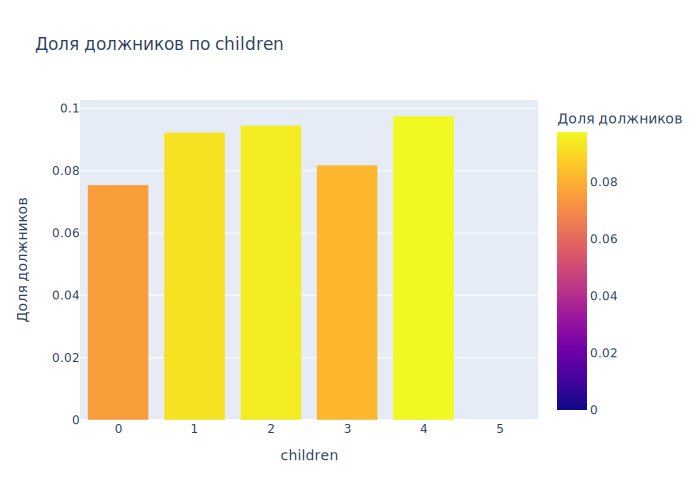

In [24]:
import plotly.express as px

def debt_pivot(data, index):
    
    pivot = data.pivot_table(index = index, values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
    pivot.columns = [index, 'Всего кредитополучателей', 'Всего должников', 'Доля должников']
    display(pivot.sort_values('Доля должников', ascending = False))
    
    fig = px.bar(pivot, x = index, y = 'Доля должников', color = 'Доля должников', title = 'Доля должников по ' + index)
    fig.show("svg") 

debt_pivot(data, 'children')

Как мы можем видеть в сводной таблице и на графике, доля должников в каждой группе семей варьируется в диапазоне от 7.5% до 9.8%.

Единственным исключением стали семьи с 5-ю детьми - среди них нет должников, однако в выборке таких семей всего 9, поэтому делать выводы по данной группе семей не представляется возможным.

Что касается остальных групп - **четкой обратной или прямой зависимости не прослеживается**, доли колеблются в диапазоне, указанном выше. Единственным моментом, который стоит выделить, является то, что **семьи без детей являются самыми надежными заемщиками**.

Таким образом, наименьшая доля должников среди бездетных семей - 7.5%, далее идут семьи с 3-мя детьми - 8.2%, у остальных групп семей доля превысила 9%. 

Возможно, при составлении модели кредитного скоринга стоит разделить заемщиков на две группы - 'есть дети' и 'нет детей', т.к. семьи без детей - самые добросовестные заемщики, а доля должников в группах семей с детьми примерно одинаковая (за исключением семей с 3-мя детьми).

**Вывод:** 

Чем больше детей в семье, тем меньше таких семей представлено в выборке. Таким образом, с увеличением *количества* детей в семье, *количество* таких семей-должников уменьшается. Однако, это не позволяет нам говорить о зависимости между количеством детей в семье и возвратом кредита в срок. В связи с этим нами были изучены доли должников в каждой группе семей.

Доля должников в каждой группе семей варьируется в диапазоне от 7.5% до 9.8%, **четкой обратной или прямой зависимости возврата долга в срок от количества детей в семье не прослеживается**.

При этом важно будет отметить, что среди представленных групп семей **самыми добросовестными заемщиками являются бездетные семьи** (доля должников 7.5%). Вторыми по доле должников являются семьи с 3-мя детьми (8.2%), доля должников среди семей с 1-м, 2-мя и 4-мя детьми превысила 9%. В выборке представлено слишком малое количество семей с 5-ю детьми, поэтому, несмотря на своевременный возврат долга всех таких семей, корректный анализ их кредитоспособности не представляется возможным.

## 2.2. Зависимость между семейным положением и возвратом кредита в срок

Прежде всего, проверим, сколько заемщиков с различным семейным положением представлено в выборке.

Для этого воспользуемся методами **`groupby()`** и **`count()`** для столбца **`family_status`**, а также проведем сортировку методом **`sort_values()`**:

In [25]:
data.groupby('family_status')['family_status'].count().sort_values(ascending=False)

family_status
женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64

Наибольшее количество заемщиков женаты/замужем - 12261, в гражданском браке состоят 4134 заемщика, не женаты/не замужем - 2796 заемщиков, меньше всего заемщиков в разводе или вдовцы/вдовы - 1189 и 951 соответственно.

Далее нам необходимо изучить непосредственно взаимосвязь между семейным положением заемщика и возвратом кредита в срок.

В данном случае необходимо воспользоваться информацией из столбцов **`family_status`** и **`debt`**.

Воспользуемся двумя методами - **`groupby()`** и **`sum()`**, а также проведем сортировку методом **`sort_values()`**:

In [26]:
data.groupby('family_status')['debt'].sum().sort_values(ascending=False)

family_status
женат / замужем          927
гражданский брак         385
Не женат / не замужем    273
в разводе                 84
вдовец / вдова            63
Name: debt, dtype: int64

Как и в случае с группировкой по количеству детей, снова рассчитаем доли должников в каждой группе.

Для этого разделим количество должников на общее количество заемщиков с учетом группировки по семейному положению.

Для наглядности отсортируем в порядке возрастания доли должников с помощью метода **`sort_values()`**:

In [27]:
# в данном случае создадим переменную для дальнейшей сортировки результатов
family_status_debt = data.groupby('family_status')['debt'].sum()/data.groupby('family_status')['family_status'].count()
family_status_debt.sort_values()

family_status
вдовец / вдова           0.066246
в разводе                0.070648
женат / замужем          0.075606
гражданский брак         0.093130
Не женат / не замужем    0.097639
dtype: float64

Для более комфортного восприятия полученных результатов представим их в сводной таблице и визуализируем.

Передадим функции **``debt_pivot``** датафрейм **``data``** и признак - в данном случае, семейное положение заемщика **``family_status``**.

,family_status,Всего кредитополучателей,Всего должников,Доля должников
0,Не женат / не замужем,2796,273,0.097639
3,гражданский брак,4134,385,0.093130
4,женат / замужем,12261,927,0.075606
1,в разводе,1189,84,0.070648
2,вдовец / вдова,951,63,0.066246


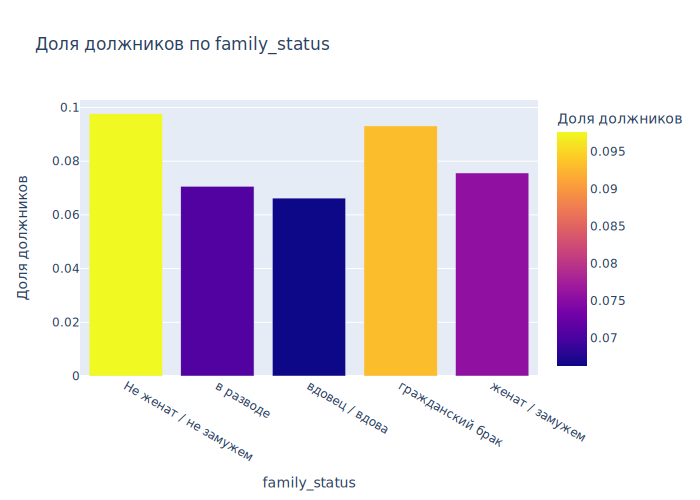

In [28]:
debt_pivot(data, 'family_status')

Лучшими для банка заемщиками оказались вдовцы/вдовы и люди в разводе - их доли составили 6.6% и 7.1% соответственно. Несмотря на то, что в выборке эти категории представлены меньше всего, количество таких заемщиков позволяет учитывать их в общем анализе.

Доля должников среди заемщиков, состоящих в официальном браке, составила 7.5%.

Наименее надежными заемщиками, оказались люди состоящие в гражданском браке, либо неженатые/незамужние - доли должников среди таких заемщиков гораздо хуже, чем у других групп, и составляют 9.3% и 9.8% соответственно.

**Вывод:** 

**Самые добросовестные заемщики - вдовы/вдовцы (доля должников 6.6%) и люди в разводе (7.1%)**, чуть хуже возвращают долг заемщики, состоящие в официальном браке (7.5%).

**Самые ненадежные заемщики - люди, состоящие в гражданском браке (9.3%) и неженатые/незамужние (9.8%).**

Таким образом, можно сделать вывод, что **люди, побывавшие в официальном браке, наиболее надежны**. Возможно, существует связь с возрастом, т.к. средний возраст людей, побывавших в официальном браке (вдовцы/вдовы, разведены, сейчас в браке) явно выше, чем средний возраст тех, кто в нем не состоял (неженатые/незамужние, гражданский брак).

## 2.3. Зависимость между уровнем дохода и возвратом кредита в срок

Прежде всего, проверим, сколько заемщиков с различным уровнем дохода представлено в выборке.

Для этого воспользуемся методами **`groupby()`** и **`count()`** для столбца **`total_income_category`**, а также проведем сортировку методом **`sort_values()`**:

In [29]:
data.groupby('total_income_category')['total_income_category'].count().sort_values(ascending=False)

total_income_category
C    15921
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64

Таким образом, основной сегмент заемщиков представлен средней категорией С с доходом от 50 001 до 200 000, в три раза меньше клиентов в категории В с доходом в диапазоне от 200 001 до 1 000 000. Категория D представлена 349 заемщиками.

Наименьшее количество заемщиков представлено в крайних категориях А и Е: с доходом более 1 000 000 - 25 заемщиков, менее 30 000 - 22 заемщика.

Далее нам необходимо изучить непосредственно взаимосвязь между уровнем дохода заемщика и возвратом кредита в срок.

В данном случае необходимо воспользоваться информацией из столбцов **`total_income_category`** и **`debt`**.

Воспользуемся двумя методами - **`groupby()`** и **`sum()`**, а также проведем сортировку методом **`sort_values()`**:

In [30]:
data.groupby('total_income_category')['debt'].sum().sort_values(ascending=False)

total_income_category
C    1353
B     354
D      21
A       2
E       2
Name: debt, dtype: int64

Аналогично предыдущим шагам рассчитаем доли должников в каждой группе.

Для этого разделим количество должников на общее количество заемщиков с учетом группировки по уровню дохода.

Для наглядности отсортируем в порядке возрастания доли должников с помощью метода **`sort_values()`**:

In [31]:
# в данном случае создадим переменную для дальнейшей сортировки результатов
income_debt = data.groupby('total_income_category')['debt'].sum()/data.groupby('total_income_category')['total_income_category'].count()
income_debt.sort_values()

total_income_category
D    0.060172
B    0.070602
A    0.080000
C    0.084982
E    0.090909
dtype: float64

Для более комфортного восприятия полученных результатов представим их в сводной таблице и визуализируем.

Передадим функции **``debt_pivot``** датафрейм **``data``** и признак - в данном случае, уровень дохода заемщика **``total_income_category``**.

,total_income_category,Всего кредитополучателей,Всего должников,Доля должников
4,E,22,2,0.090909
2,C,15921,1353,0.084982
0,A,25,2,0.080000
1,B,5014,354,0.070602
3,D,349,21,0.060172


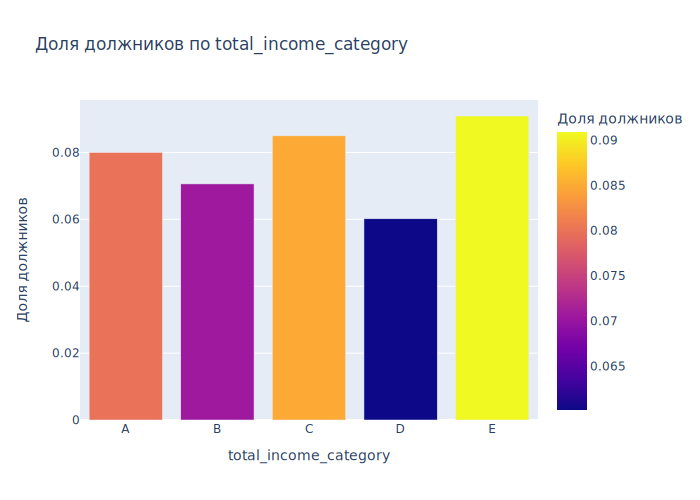

In [32]:
debt_pivot(data, 'total_income_category')

Учитывая численный состав категорий заемщиков, важно отметить, что категории A, D, E - достаточно малочисленны, что влечет за собой существенную статистическую погрешность, поэтому корректный анализ данных категорий не представляется возможным.

В связи с этим пригодных для анализа категорий остается две - B (с доходом выше среднего) и C (со средним уровнем дохода), т.к. данные группы представлены несколькими тысячами заемщиков.

Доля должников среди заемщиков с уровнем дохода выше среднего составила 7%, в то время как доля должников среди клиентов со средним уровнем дохода - 8.5%. Разница в 1.5% может служить индикатором того, что **зависимость между уровнем дохода и возвратом кредита в срок есть - с ростом дохода, доля должников уменьшается, т.е. связь обратная (доход↑, долг ↓)**.

**Вывод:** 

Категории дохода, представленные малым числом заемщиков, а именно A, D, и E, не рассматривались при анализе, т.к. для них нельзя гарантировать корректность выводов.

**Нами были изучены категории с доходом выше среднего (B) и средним доходом (C). Среди первых доля должников составила 7%, в то время как у среднего класса - 8.5%. Существенная разница в 1.5% указывает на обратную связь между уровнем дохода и долей должников - с ростом дохода, доля недобросовестных заемщиков падает** (*или же прямую между уровнем дохода и возвратом в срок - выше доход, лучше возвращают*).

## 2.4. Зависимость между целью кредита и возвратом кредита в срок

Прежде всего, проверим, сколько заемщиков с различным целями кредита представлено в выборке.

Для этого воспользуемся методами **`groupby()`** и **`count()`** для столбца **`purpose_category`**, а также проведем сортировку методом **`sort_values()`**:

In [33]:
data.groupby('purpose_category')['purpose_category'].count().sort_values(ascending=False)

purpose_category
операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

Больше всего кредитов берут на операции с недвижимостью - 10 751. Примерно равное количество кредитов взято на операции с автомобилем и получение образования - 4279 и 3988 соответственно. Меньше всего "свадебных" кредитов - 2313.

Далее нам необходимо изучить непосредственно взаимосвязь между целью кредита заемщиков и возвратом кредита в срок.

В данном случае необходимо воспользоваться информацией из столбцов **`purpose_category`** и **`debt`**.

Воспользуемся двумя методами - **`groupby()`** и **`sum()`**, а также проведем сортировку методом **`sort_values()`**:

In [34]:
data.groupby('purpose_category')['debt'].sum().sort_values(ascending=False)

purpose_category
операции с недвижимостью    780
операции с автомобилем      400
получение образования       369
проведение свадьбы          183
Name: debt, dtype: int64

Аналогично предыдущим шагам рассчитаем доли должников в каждой группе.

Для этого разделим количество должников на общее количество заемщиков с учетом группировки по целям кредита.

Для наглядности отсортируем в порядке возрастания доли должников с помощью метода **`sort_values()`**:

In [35]:
purpose_debt = data.groupby('purpose_category')['debt'].sum()/data.groupby('purpose_category')['purpose_category'].count()
purpose_debt.sort_values()

purpose_category
операции с недвижимостью    0.072551
проведение свадьбы          0.079118
получение образования       0.092528
операции с автомобилем      0.093480
dtype: float64

Для более комфортного восприятия полученных результатов представим их в сводной таблице и визуализируем.

Передадим функции **``debt_pivot``** датафрейм **``data``** и признак - в данном случае, цель кредита **``purpose_category``**.

,purpose_category,Всего кредитополучателей,Всего должников,Доля должников
0,операции с автомобилем,4279,400,0.093480
2,получение образования,3988,369,0.092528
3,проведение свадьбы,2313,183,0.079118
1,операции с недвижимостью,10751,780,0.072551


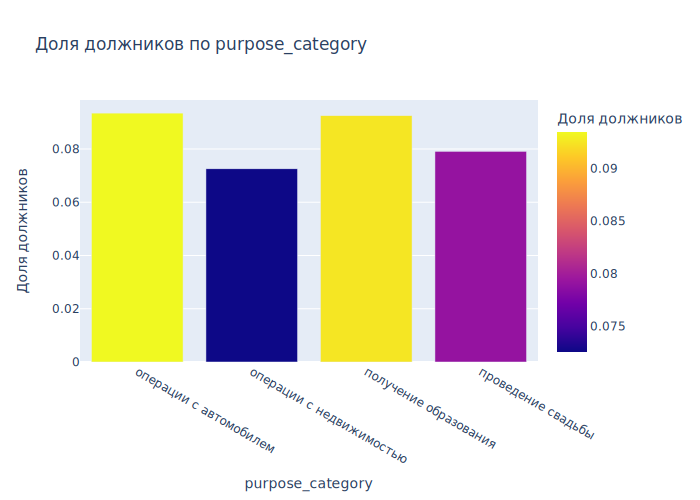

In [36]:
debt_pivot(data, 'purpose_category')

Таким образом, можем заметить, что кредиты на недвижимость возвращают лучше всего - доля должников составляет 7.2%, чуть хуже выплачиваются "свадебные" кредиты с долей должников 7.9%.

Хуже обстоят дела с "образовательными" и "автомобильными" кредитами - доли должников в группах с данными целями кредита составили 9.3%.

**Вывод:** 

По целям кредита наблюдаются четкие различия в проценте должников.

**Больше всего берут и лучше всего возвращают кредиты на недвижимость (доля должников 7.2%)**. Кредиты на свадьбу также возвращают неплохо (7.9%).

**Кредиты на операции с автомобилями и кредиты на образование (по 9.3%) доставляют больше проблем со своевременной выплатой, чем первые две группы**.

# Этап 3. Подведение итогов

Подведем итог проделанной работе.

Заказчиком (кредитным отделом банка) было дано задание выявить взаимосвязь возврата кредита в срок от различных факторов - количества детей, семейного положения, уровня дохода и цели кредита.

На этапе предобработки данных было выявлено наличие пропусков в столбцах с информацией о трудовом стаже **``days_employed``** и ежемесячном доходе **``total_income``**, а также отрицательные значения трудового стажа. Отрицательные значения были обработаны методом **``abs()``**, пропуски были заполнены медианными значениями по соответствующему типу занятости **``income_type``**. Помимо этого, были устранены аномальные значения в столбце **``children``**, содержащем информацию о количестве детей заемщика, путем удаления строк, содержащих такие значения. В столбце **``total_income``** данные были приведены к целочисленному типу **``int``** методом **``astype()``**. Неявные дубликаты в столбце **``education``** с информацией об образовании были устранены путем приведения всех значений к нижнему регистру методом **``str.lower()``**. Количество явных дубликатов во всем датафрейме составило 71, такие строки были устранены при помощи метода **``drop_duplicates()``**.

Далее нами была проведена категоризация данных по уровню дохода **``total_income``** и целям кредита **``purpose``**. По уровню дохода клиенты были разделены на 5 последовательных категорий от A до E (где A - наибольший доход, E - наименьший). Среди целей кредита было выделено 4 категории: на получение образование, на операции с недвижимостью, на операции с автомобилем, на проведение свадьбы. Категоризация была проведена с помощью создания категоризирующей функции для каждого из факторов и создания новых столбцов с категориями в исходном датафрейме.

Далее мы перешли к этапу анализа обработанных данных, который заключался в поиске взаимосвязей своевременного возврата кредита от различных характеристик заемщика и цели кредита.

При группировке заемщиков по количеству детей было выявлено, что клиенты, не имеющие детей, оказались самыми добросовестными заемщиками, а среди семей с детьми наиболее надежными заемщиками являются семьи с 3-мя детьми. Семей с 5-ю детьми слишком мало в представленной выборке, поэтому они не учитывались при формулировке итоговых выводов.

Изучая семейное положение заемщиков, выяснилось, что лучше всего возвращают кредиты люди, побывавшие в официальном браке (вдовы/вдовцы, в разводе, в браке сейчас). Заемщики, не имеющие такого опыта (в гражданском браке, либо неженатые/незамужние), оказались менее надежными.

Что касается анализа по уровню дохода заемщиков, важным будет отметить, что категории дохода A, D, и E, представленные малым числом заемщиков, не рассматривались при анализе, потому что это могло повлечь за собой некорректность выводов и искажение действительности. Нами были изучены категории с доходом выше среднего (B) и средним доходом (C). У первой группы клиентов доля должников составила 7%, в то время как у заемщиков-представителей среднего класса - 8.5%. Существенная разница в 1.5% указывает на обратную связь между уровнем дохода и долей должников - с ростом дохода, доля недобросовестных заемщиков падает.

При исследовании взаимосвязи с целями кредита, было определено, что самыми популярными являются кредиты на недвижимость, причем возвращают их тоже лучше всего. Кредиты на свадьбу также отличаются хорошей своевременностью выплат на фоне других категорий. "Автомобильные" и "образовательные" кредиты - наиболее проблемные.

Портрет "идеального" заемщика для банка на основе изученных взаимосвязей с перечисленными выше факторами выглядит так:
- не имеет детей;
- состоит/состоял в официальном браке;
- имеет ежемесячный доход выше среднего (200 000 - 1 000 000);
- берет кредит на недвижимость.

В противовес этому, портрет наиболее рискованного для банка заемщика выглядит следующим образом:
- имеет 1-го, 2-х или 4-х детей;
- не состоит/не состоял в официальном браке;
- имеет ежемесячный доход менее 200 000;
- берет кредит на получение образования или операции с автомобилем.

Помимо представленного описания портретов идеального/рискованного заемщика, в качестве рекомендаций банку-заказчику прежде всего хочется отметить стандартизацию получения информации о заемщиках - мы понимаем, что ни технический, ни человеческий фактор на 100% устранить невозможно, однако стандартизированная система заполнения заявлений/анкетирования/предоставления данных о клиенте смогли бы минимизировать проблемы пропусков/дубликатов. 